In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date, datetime, time


In [ ]:
df = pd.read_csv("/content/amazon_delivery.csv")
df.info()
print(" First 5 rows",df.head())       # First 5 rows
print(" Data types & null values",df.info())       # Data types & null values
print("Data describtion",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
 

In [ ]:
print("null value number",df.isnull().sum())
print("number of duplicates",df.duplicated().sum())

null value number Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64
number of duplicates 0


In [ ]:
# Filter invalid coordinates
#df = df[(df['Store_Latitude'].between(-90, 90)) & (df['Store_Longitude'].between(-180, 180))]
# Check if all latitudes are valid
valid_lat = df['Store_Latitude'].between(-90, 90).all()

# Check if all longitudes are valid
valid_lon = df['Store_Longitude'].between(-180, 180).all()

print("Latitude values valid:", valid_lat)
print("Longitude values valid:", valid_lon)

Latitude values valid: True
Longitude values valid: True


In [ ]:
#df = df[(df['Drop_Latitude'].between(-90, 90)) & (df['Drop_Longitude'].between(-180, 180))]
valid_lat = df['Drop_Latitude'].between(-90, 90).all()

# Check if all longitudes are valid
valid_lon = df['Drop_Longitude'].between(-180, 180).all()
print("Latitude values valid:", valid_lat)
print("Longitude values valid:", valid_lon)

Latitude values valid: True
Longitude values valid: True


In [ ]:
#unique values on catagoricals data
exp_col=['Weather', 'Traffic' , 'Vehicle','Area','Category']

for col in exp_col:
    print(f"Unique values in '{col}':")
    print(df[col].value_counts())

Unique values in 'Weather':
Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64
Unique values in 'Traffic':
Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64
Unique values in 'Vehicle':
Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64
Unique values in 'Area':
Area
Metropolitian     32698
Urban              9751
Other              1138
Semi-Urban          152
Name: count, dtype: int64
Unique values in 'Category':
Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name:

Data Cleaning

In [ ]:
cleanDf=df.copy()

#dropping duplicates on Agent_Rating , Weather
cleanDf= df.dropna(subset=["Agent_Rating" ,"Weather"])
print("number of duplicates",cleanDf.duplicated().sum())

cleanDf

number of duplicates 0


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [ ]:
categorical_columns = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

for col in categorical_columns:
    print(f'{col}:')
    print("--------------")
    print(cleanDf[col].unique())
    print("==============")

Weather:
--------------
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
Traffic:
--------------
['High ' 'Jam ' 'Low ' 'Medium ']
Vehicle:
--------------
['motorcycle ' 'scooter ' 'van']
Area:
--------------
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
Category:
--------------
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


In [ ]:
for col in cleanDf.columns:
    print(f"{col}: {cleanDf[col].nunique()} unique values")

Order_ID: 43594 unique values
Agent_Age: 20 unique values
Agent_Rating: 26 unique values
Store_Latitude: 489 unique values
Store_Longitude: 389 unique values
Drop_Latitude: 4365 unique values
Drop_Longitude: 4365 unique values
Order_Date: 44 unique values
Order_Time: 176 unique values
Pickup_Time: 193 unique values
Weather: 6 unique values
Traffic: 4 unique values
Vehicle: 3 unique values
Area: 4 unique values
Delivery_Time: 89 unique values
Category: 16 unique values


In [ ]:
cleanDf.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,0
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [ ]:
#check if there is rating more thsn 5

cleanDf[cleanDf["Agent_Rating"]>5]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [ ]:
cleanDf.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,17.244769,70.768898,17.461540,70.832489,124.916433
std,5.760689,0.313827,7.690005,21.128773,7.338199,21.128940,51.941975
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.986054,73.280000,90.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.102309,160.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [ ]:
#to diaplay rows with missing values
cleanDf[cleanDf.isnull().any(axis=1)]


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [ ]:
cleanDf['Weather'].mode()


,Weather
0,Fog


In [ ]:
#cleanDf['Pickup_Time'] = pd.to_datetime(cleanDf['Pickup_Time'], format='%I:%M:%S %p').dt.time

cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 6.7+ MB


In [ ]:
cleanDf['Pickup_Time'] = pd.to_datetime(cleanDf['Pickup_Time'], format='%H:%M:%S').dt.time

# Extracting the hour
cleanDf['pickup_hour'] = pd.to_datetime(cleanDf['Pickup_Time'].astype(str), format='%H:%M:%S').dt.hour

# Extract AM or P<
cleanDf['PMorAM'] = pd.to_datetime(cleanDf['Pickup_Time'].astype(str), format='%H:%M:%S').dt.strftime('%p')

print(cleanDf)
print(cleanDf.dtypes)

/tmp/ipython-input-2627701648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Pickup_Time'] = pd.to_datetime(cleanDf['Pickup_Time'], format='%H:%M:%S').dt.time
/tmp/ipython-input-2627701648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['pickup_hour'] = pd.to_datetime(cleanDf['Pickup_Time'].astype(str), format='%H:%M:%S').dt.hour


            Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  2022-03-19   11:30:00   
1            77.683237      13.043041       77.813237  2022

/tmp/ipython-input-2627701648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['PMorAM'] = pd.to_datetime(cleanDf['Pickup_Time'].astype(str), format='%H:%M:%S').dt.strftime('%p')


In [ ]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43594 entries, 0 to 43738
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43594 non-null  object 
 1   Agent_Age        43594 non-null  int64  
 2   Agent_Rating     43594 non-null  float64
 3   Store_Latitude   43594 non-null  float64
 4   Store_Longitude  43594 non-null  float64
 5   Drop_Latitude    43594 non-null  float64
 6   Drop_Longitude   43594 non-null  float64
 7   Order_Date       43594 non-null  object 
 8   Order_Time       43594 non-null  object 
 9   Pickup_Time      43594 non-null  object 
 10  Weather          43594 non-null  object 
 11  Traffic          43594 non-null  object 
 12  Vehicle          43594 non-null  object 
 13  Area             43594 non-null  object 
 14  Delivery_Time    43594 non-null  int64  
 15  Category         43594 non-null  object 
 16  pickup_hour      43594 non-null  int32  
 17  PMorAM           

In [ ]:
cleanDf.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,pickup_hour,PMorAM
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,11,AM
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,19,PM
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,8,AM
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18,PM
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,13,PM


In [ ]:
cleanDf['Order_Date'] = pd.to_datetime(cleanDf['Order_Date'], errors='coerce')


/tmp/ipython-input-1824210060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_Date'] = pd.to_datetime(cleanDf['Order_Date'], errors='coerce')


In [ ]:

cleanDf['Order_of_week_day'] = cleanDf['Order_Date'].dt.day_of_week
cleanDf['Order_Month'] = cleanDf['Order_Date'].dt.month

cleanDf

/tmp/ipython-input-2129793433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_of_week_day'] = cleanDf['Order_Date'].dt.day_of_week
/tmp/ipython-input-2129793433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDf['Order_Month'] = cleanDf['Order_Date'].dt.month


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,pickup_hour,PMorAM,Order_of_week_day,Order_Month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,11,AM,5,3
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,19,PM,4,3
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,8,AM,5,3
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18,PM,1,4
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,13,PM,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,11,AM,3,3
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,20,PM,2,2
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,0,AM,4,3
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,13,PM,0,3


In [ ]:
print(cleanDf[['Order_Date', 'Order_of_week_day', 'Order_Month']].head())


  Order_Date  Order_of_week_day  Order_Month
0 2022-03-19                  5            3
1 2022-03-25                  4            3
2 2022-03-19                  5            3
3 2022-04-05                  1            4
4 2022-03-26                  5            3


Univariate Analysis using seaborn and matplot

<Axes: xlabel='Agent_Age'>

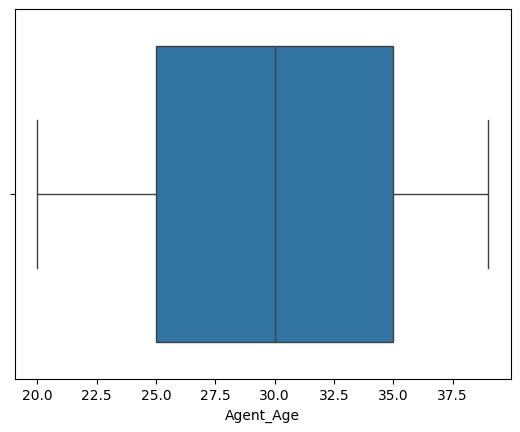

In [ ]:
sns.boxplot(x=cleanDf['Agent_Age'])


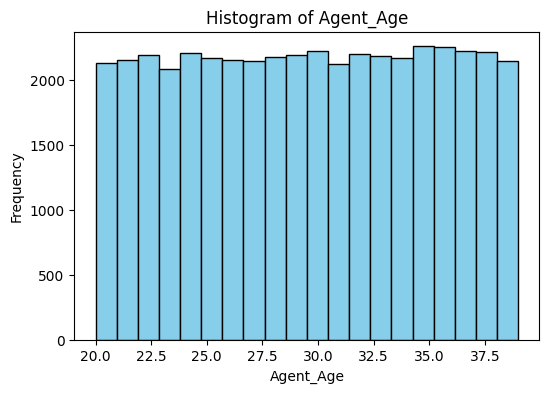

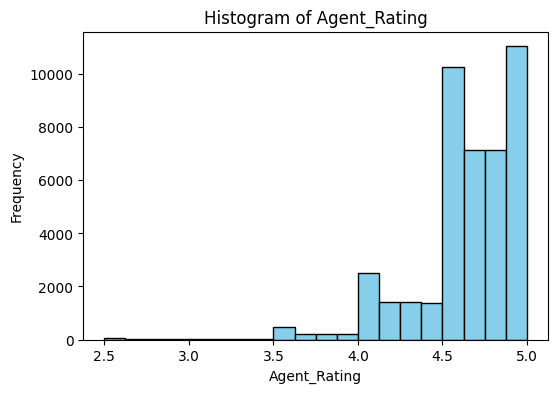

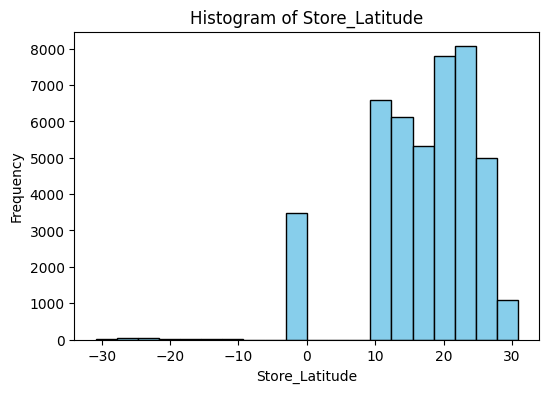

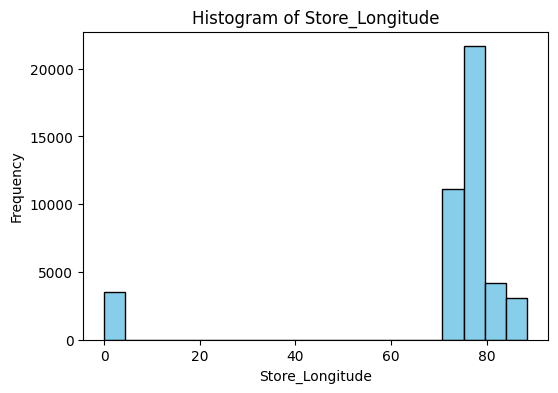

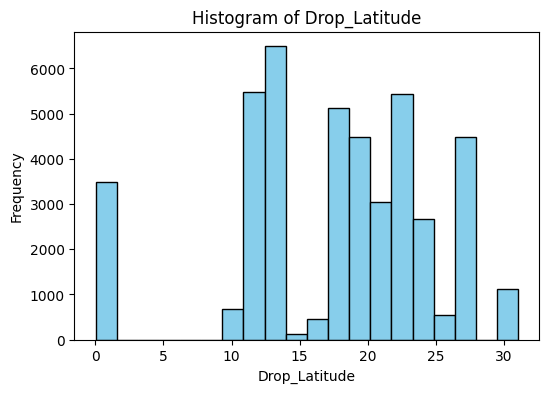

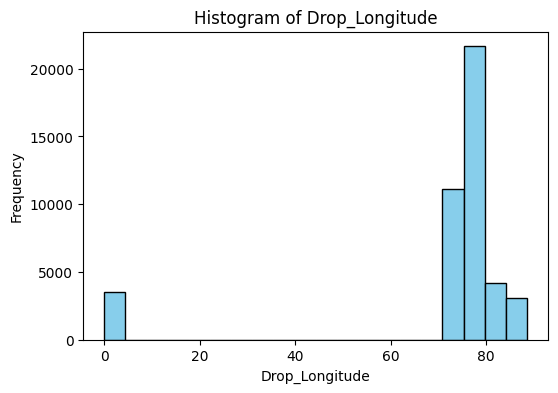

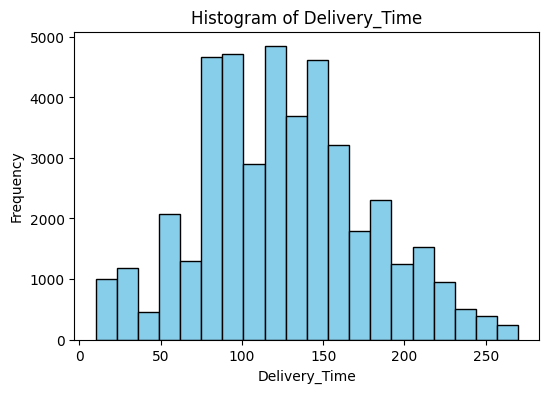

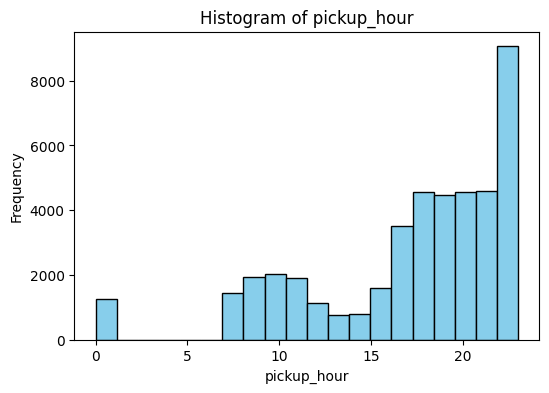

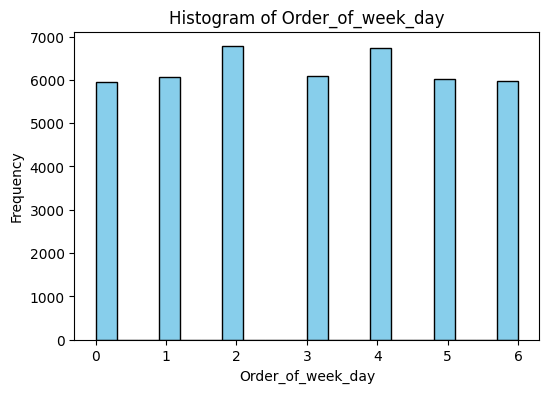

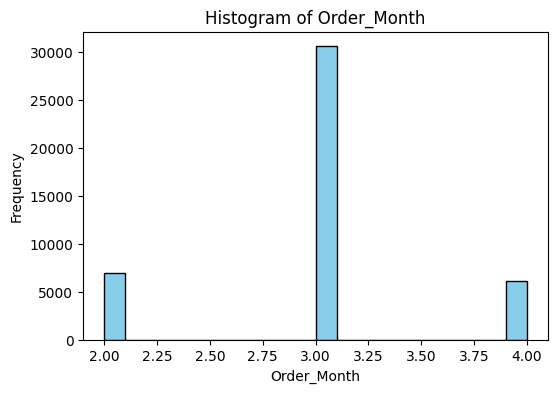

In [ ]:
for col in cleanDf.columns:
    if pd.api.types.is_numeric_dtype(cleanDf[col]):  # only numeric columns
        plt.figure(figsize=(6, 4))
        plt.hist(cleanDf[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

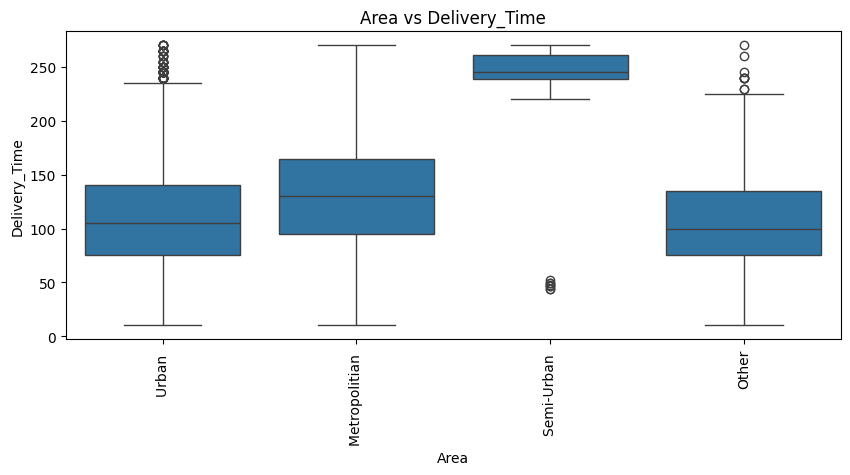

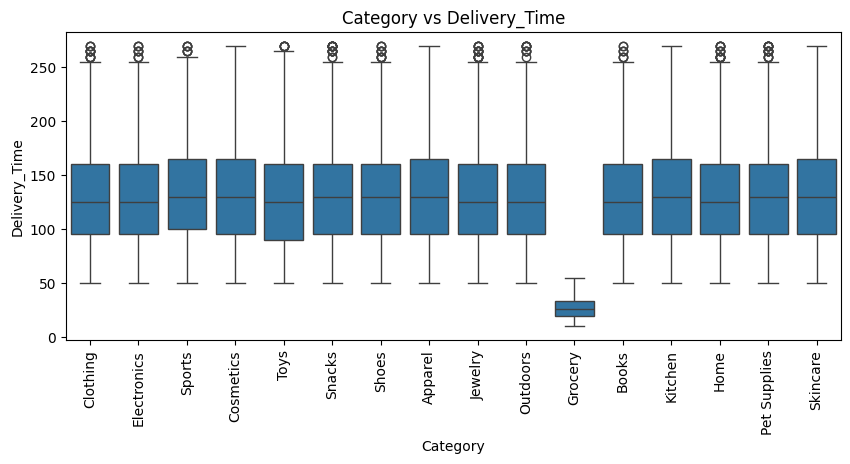

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=cleanDf, x='Area', y='Delivery_Time')
plt.title('Area vs Delivery_Time')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=cleanDf, x='Category', y='Delivery_Time')
plt.title('Category vs Delivery_Time')
plt.xticks(rotation=90)
plt.show()

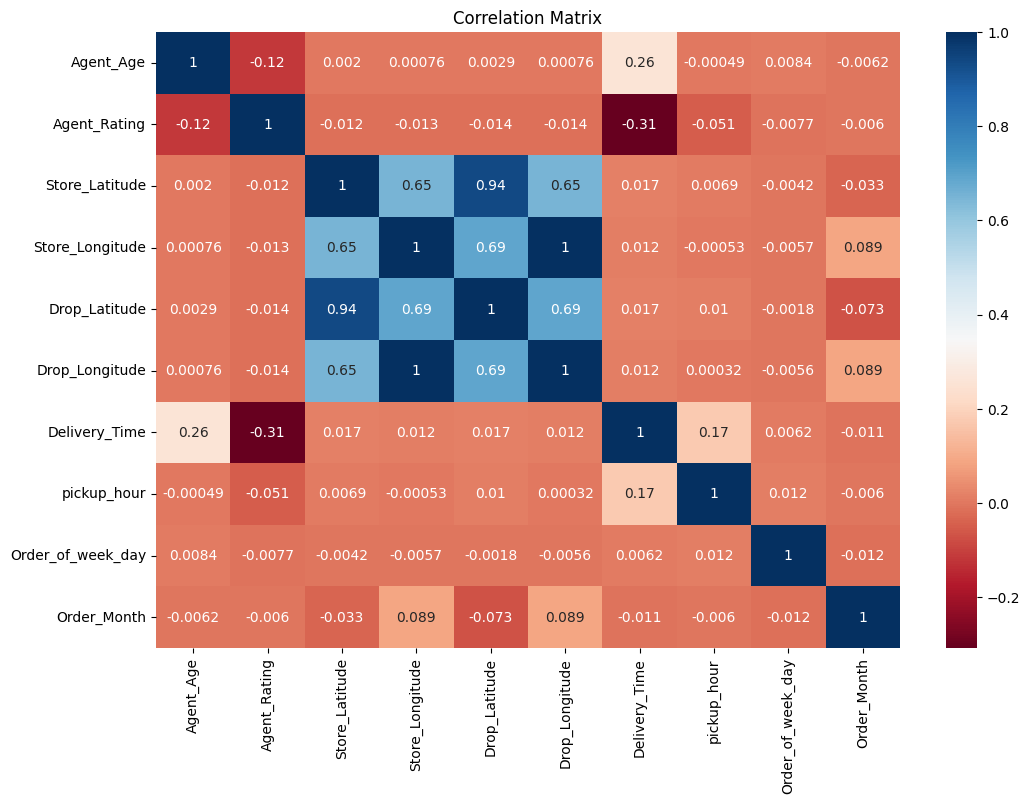

In [ ]:
numeric_cols = cleanDf.select_dtypes(include = np.number).columns
plt.figure(figsize =(12,8))
sns.heatmap(cleanDf[numeric_cols].corr(), annot = True , cmap = 'RdBu')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cleanDf.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,pickup_hour,PMorAM,Order_of_week_day,Order_Month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,11,AM,5,3
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,19,PM,4,3
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,8,AM,5,3
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18,PM,1,4
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,13,PM,5,3


In [ ]:
# using gruop by age to calcluate the mean rating
result = cleanDf.groupby('Agent_Age', as_index=False)['Agent_Rating'].mean()

print(result)

    Agent_Age  Agent_Rating
0          20      4.682942
1          21      4.683086
2          22      4.673507
3          23      4.685653
4          24      4.674853
5          25      4.672376
6          26      4.676217
7          27      4.675012
8          28      4.685846
9          29      4.671553
10         30      4.596535
11         31      4.585182
12         32      4.584227
13         33      4.596566
14         34      4.593072
15         35      4.592958
16         36      4.599690
17         37      4.603372
18         38      4.594585
19         39      4.585621


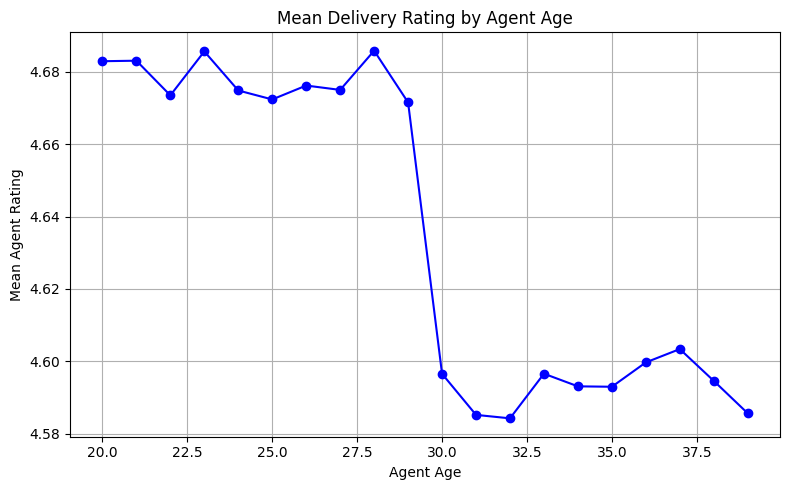

In [ ]:
# Plot the grouped data as a line graph
plt.figure(figsize=(8, 5))
plt.plot(result['Agent_Age'], result['Agent_Rating'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Mean Delivery Rating by Agent Age')
plt.xlabel('Agent Age')
plt.ylabel('Mean Agent Rating')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

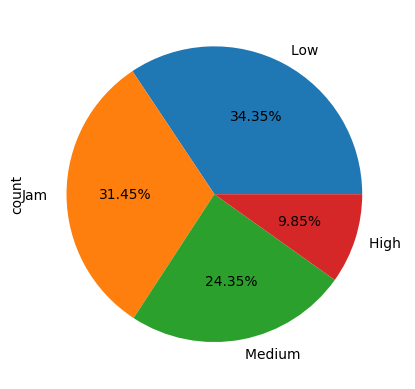

In [ ]:
cleanDf["Traffic"].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

<Axes: xlabel='Area', ylabel='Delivery_Time'>

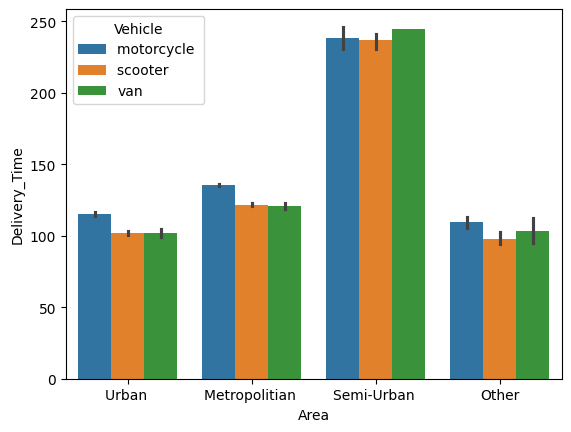

In [ ]:
sns.barplot(cleanDf,y=cleanDf["Delivery_Time"],x=cleanDf["Area"],hue=cleanDf["Vehicle"])

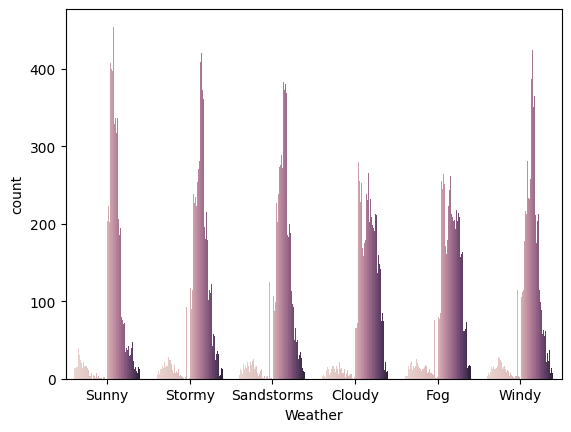

In [ ]:
sns.countplot(x=cleanDf["Weather"],hue=cleanDf["Delivery_Time"])
plt.legend([], [], frameon=False)

In [ ]:
df.to_csv('/content/cleaned_mapping.csv', index=False)
print("تم الحفظ: /content/cleaned_mapping.csv")

تم الحفظ: /content/cleaned_mapping.csv


In [ ]:
!pip -q install h3 shapely geopandas folium branca

In [ ]:
import pandas as pd, numpy as np, folium
from folium.plugins import MarkerCluster, HeatMap

# ================== الإعدادات ==================
CSV = "/content/cleaned_mapping.csv"
ROUND_DECIMALS = 5                     # تقريب إحداثيات الستور لدمج نقاط نفس الستور
USE_CLUSTER = True                     # لو قليلة الستورز تقدرين تخليه False
SHOW_DROPS_HEATMAP = False             # الهِيت ماب للدروب مطفّاة افتراضياً
R_MIN, R_MAX = 7, 26                   # حدود أحجام الدوائر


# صفوف صالحة للستور
stores = df.dropna(subset=["Store_Latitude","Store_Longitude"]).copy()
stores = stores[
    stores["Store_Latitude"].between(-90,90) &
    stores["Store_Longitude"].between(-180,180)
]


stores["Store_Lat_r"] = stores["Store_Latitude"].round(ROUND_DECIMALS)
stores["Store_Lon_r"] = stores["Store_Longitude"].round(ROUND_DECIMALS)
stores["store_key"]   = stores["Store_Lat_r"].astype(str)+","+stores["Store_Lon_r"].astype(str)

# ================== تجميع ملخص لكل ستور ==================
def pctl(series, q):
    s = pd.to_numeric(series, errors="coerce").dropna()
    return np.nan if s.empty else float(np.percentile(s, q))

g = stores.groupby("store_key")
agg = pd.DataFrame({
    "orders":           g.size(),
    "store_lat":        g["Store_Lat_r"].first(),
    "store_lon":        g["Store_Lon_r"].first(),
    "avg_delivery":     g["Delivery_Time"].mean(),
    "median_delivery":  g["Delivery_Time"].median(),
    "p90_delivery":     g["Delivery_Time"].apply(lambda s: pctl(s, 90)),
    "avg_rating":       g["Agent_Rating"].mean(),
}).reset_index(drop=True)

for c in ["avg_delivery","median_delivery","p90_delivery","avg_rating"]:
    agg[c] = agg[c].round(2)

# ================== قياسات اللون/الحجم الهادئة ==================
o_min, o_max = int(agg["orders"].min()), int(agg["orders"].max())

# ناخذ الجذر عشان نخفف القيم الكبيره
def radius_for(v, vmin=o_min, vmax=o_max, rmin=R_MIN, rmax=R_MAX):
    if vmax == vmin:
        return (rmin + rmax)/2
    t = (v - vmin) / (vmax - vmin)
    t = max(0.0, min(1.0, t))
    t = np.sqrt(t)
    return float(rmin + t * (rmax - rmin))

# الوان
def color_for(v, vmin=o_min, vmax=o_max):
    if vmax == vmin:
        return "#F4C542"  # أصفر/ذهبي
    t = (v - vmin) / (vmax - vmin)
    t = max(0.0, min(1.0, t))
    # مزج بين أخضر (0,155,85) وأحمر (200,60,60) عبر tالوان
    g1 = (0,155,85); r1 = (200,60,60)
    r = int(g1[0] + t*(r1[0]-g1[0]))
    g_ = int(g1[1] + t*(r1[1]-g1[1]))
    b = int(g1[2] + t*(r1[2]-g1[2]))
    return f"#{r:02x}{g_:02x}{b:02x}"


center = [agg["store_lat"].mean(), agg["store_lon"].mean()]
m = folium.Map(location=center, zoom_start=7, tiles="CartoDB positron")

stores_fg = folium.FeatureGroup(name=" Stores — clean summary").add_to(m)
container = MarkerCluster() if USE_CLUSTER else stores_fg
if USE_CLUSTER:
    container.add_to(stores_fg)

for _, r in agg.iterrows():
    popup_html = f"""
    <div style="font-size:13px; line-height:1.35; max-width:320px;">
      <b>Orders:</b> {int(r['orders'])}<br>
      <b>Avg:</b> {r['avg_delivery']} • <b>Median:</b> {r['median_delivery']} • <b>P90:</b> {r['p90_delivery']}<br>
      <b>Avg Rating:</b> {r['avg_rating']}
    </div>
    """
    folium.CircleMarker(
        location=[float(r["store_lat"]), float(r["store_lon"])],
        radius=radius_for(int(r["orders"])),
        color=color_for(int(r["orders"])),
        fill=True, fill_color=color_for(int(r["orders"])), fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=340),
        tooltip=f"Orders: {int(r['orders'])}"
    ).add_to(container)

#  Drops Heatmap
if {"Drop_Latitude","Drop_Longitude"} <= set(df.columns):
    drops = df.dropna(subset=["Drop_Latitude","Drop_Longitude"]).copy()
    drops = drops[
        drops["Drop_Latitude"].between(-90,90) &
        drops["Drop_Longitude"].between(-180,180)
    ]
    if len(drops) > 1:
        drops_fg = folium.FeatureGroup(name=" Drops density ", show=SHOW_DROPS_HEATMAP).add_to(m)
        HeatMap(
            drops[["Drop_Latitude","Drop_Longitude"]].astype(float).values.tolist(),
            radius=16, blur=20
        ).add_to(drops_fg)


folium.LayerControl(collapsed=False).add_to(m)
OUT = "/content/stores_clean_summary_map1.html"
m.save(OUT)


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

OUT_DIR = "/content/maps/cartopy"
os.makedirs(OUT_DIR, exist_ok=True)

# === دوال مساعدة ===
def scale_sizes(series, smin=30, smax=110, use_sqrt=True):
    """تحويل قيم (مثلاً orders) لأحجام فقاعات متوازنة بصريًا."""
    series = series.fillna(0)
    vmin, vmax = series.min(), series.max()
    if vmax == vmin:
        return np.full(len(series), (smin + smax) / 2.0)
    t = (series - vmin) / (vmax - vmin)
    if use_sqrt:
        t = np.sqrt(t)  # يصغر القيم الكبيره
    return smin + t * (smax - smin)

def cartopy_scatter_map(
    gdf, color_col, size_col="orders",
    cmap="OrRd", legend_label=None,
    title="", out_path=None,
    facecolor="#f2f2f2", coastline=True, borders=True,
    smin=30, smax=110
):
    """يرسُم خريطة Cartopy ويلون النقاط حسب color_col ويكبّرها حسب size_col ويحفظ الناتج."""
    # أحجام الفقاعات
    sizes = scale_sizes(gdf[size_col], smin=smin, smax=smax)

    # معالجة NaN للتلوين
    data = gdf[color_col].copy()
    if data.notna().sum() == 0:
        data = np.zeros(len(gdf))
        legend_label = legend_label or color_col

    # محور بخريطة PlateCarree (lat/lon)
    fig, ax = plt.subplots(
        figsize=(10, 8),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

    # خلفية بسيطة
    ax.add_feature(cfeature.LAND, facecolor=facecolor)
    if coastline:
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    if borders:
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

    # رسم النقاط (GeoPandas يحترم transform)
    gdf_to_plot = gdf.copy()
    gdf_to_plot[color_col] = data  # بعد المعالجة
    gdf_to_plot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        column=color_col,
        cmap=cmap,
        markersize=sizes,
        alpha=0.9,
        edgecolor="black",
        linewidth=0.3,
        legend=True,
        legend_kwds={"label": legend_label or color_col}
    )

    # عنوان وزوم تلقائي على البيانات
    ax.set_title(title, fontsize=13)
    xmin, ymin, xmax, ymax = gdf.total_bounds
    pad_x = max((xmax - xmin) * 0.08, 1.0)
    pad_y = max((ymax - ymin) * 0.08, 1.0)
    ax.set_extent((xmin - pad_x, xmax + pad_x, ymin - pad_y, ymax + pad_y), crs=ccrs.PlateCarree())

    # حفظ
    if out_path:
        plt.savefig(out_path, dpi=180, bbox_inches="tight")
        plt.close(fig)
        print(" Saved:", out_path)
    else:
        plt.show()


# خرائط  على معايير مختلفة
# 1) اللون = Avg Delivery | الحجم = Orders
cartopy_scatter_map(
    gdf=gdf_stores,
    color_col="avg_delivery",
    size_col="orders",
    cmap="OrRd",
    legend_label="Avg Delivery Time",
    title="Stores — Orders (size) & Avg Delivery (color)",
    out_path=os.path.join(OUT_DIR, "stores_by_avg_delivery.png")
)

# 2) اللون = Avg Rating | الحجم = Orders
cartopy_scatter_map(
    gdf=gdf_stores,
    color_col="avg_rating",
    size_col="orders",
    cmap="YlGn",
    legend_label="Avg Rating",
    title="Stores — Orders (size) & Avg Rating (color)",
    out_path=os.path.join(OUT_DIR, "stores_by_avg_rating.png")
)

# 3) اللون = Orders | الحجم = Orders (تأثير مضاعف يبرز الستور الثقيلة)
cartopy_scatter_map(
    gdf=gdf_stores,
    color_col="orders",
    size_col="orders",
    cmap="YlOrRd",
    legend_label="Orders",
    title="Stores — Orders (size & color)",
    out_path=os.path.join(OUT_DIR, "stores_by_orders.png")
)

# ========= أمثلة اختيارية (فلاتر) — شغّليها لو تبين =========
DO_PER_CATEGORY = True  # حوّلي إلى True لو تبين خريطة لكل فئة
DO_PER_AREA     = True  # حوّلي إلى True لو تبين خريطة لكل منطقة

# لو عندك DataFrame خام اسمه stores_raw فيه أعمدة Store_Latitude/Longitude و Category/Area:
# (نفس اللي استخدمناه للتجميع قبل تكوين gdf_stores)
try:
    stores_raw  # تأكدي أنه موجود من شغلك السابق
except NameError:
    stores_raw = None

if DO_PER_CATEGORY and (stores_raw is not None) and ("Category" in stores_raw.columns):
    os.makedirs(os.path.join(OUT_DIR, "categories"), exist_ok=True)
    for cat, sub in stores_raw.groupby("Category"):
        if len(sub) == 0:
            continue
        # أعيدي تجميع sub إلى gdf_stores فرعية (نفس منطقك السابق)
        sub_agg = sub.groupby(["Store_Lat_r","Store_Lon_r"]).agg(
            orders=("Store_Lat_r","size"),
            avg_delivery=("Delivery_Time","mean"),
            avg_rating=("Agent_Rating","mean")
        ).reset_index().rename(columns={"Store_Lat_r":"store_lat","Store_Lon_r":"store_lon"})
        sub_gdf = gpd.GeoDataFrame(
            sub_agg, geometry=gpd.points_from_xy(sub_agg["store_lon"], sub_agg["store_lat"]), crs="EPSG:4326"
        )
        safe = str(cat).replace("/", "_").replace("\\", "_").replace(" ", "_")
        cartopy_scatter_map(
            gdf=sub_gdf,
            color_col="avg_delivery",
            size_col="orders",
            cmap="OrRd",
            legend_label="Avg Delivery Time",
            title=f"Stores — Category: {cat}",
            out_path=os.path.join(OUT_DIR, "categories", f"stores_cat_{safe}.png")
        )

if DO_PER_AREA and (stores_raw is not None) and ("Area" in stores_raw.columns):
    os.makedirs(os.path.join(OUT_DIR, "areas"), exist_ok=True)
    for area, sub in stores_raw.groupby("Area"):
        if len(sub) == 0:
            continue
        sub_agg = sub.groupby(["Store_Lat_r","Store_Lon_r"]).agg(
            orders=("Store_Lat_r","size"),
            avg_delivery=("Delivery_Time","mean"),
            avg_rating=("Agent_Rating","mean")
        ).reset_index().rename(columns={"Store_Lat_r":"store_lat","Store_Lon_r":"store_lon"})
        sub_gdf = gpd.GeoDataFrame(
            sub_agg, geometry=gpd.points_from_xy(sub_agg["store_lon"], sub_agg["store_lat"]), crs="EPSG:4326"
        )
        safe = str(area).replace("/", "_").replace("\\", "_").replace(" ", "_")
        cartopy_scatter_map(
            gdf=sub_gdf,
            color_col="avg_delivery",
            size_col="orders",
            cmap="OrRd",
            legend_label="Avg Delivery Time",
            title=f"Stores — Area: {area}",
            out_path=os.path.join(OUT_DIR, "areas", f"stores_area_{safe}.png")
        )


 Saved: /content/maps/cartopy/stores_by_avg_delivery.png
 Saved: /content/maps/cartopy/stores_by_avg_rating.png
 Saved: /content/maps/cartopy/stores_by_orders.png
 Saved: /content/maps/cartopy/categories/stores_cat_Apparel.png
 Saved: /content/maps/cartopy/categories/stores_cat_Books.png
 Saved: /content/maps/cartopy/categories/stores_cat_Clothing.png
 Saved: /content/maps/cartopy/categories/stores_cat_Cosmetics.png
 Saved: /content/maps/cartopy/categories/stores_cat_Electronics.png
 Saved: /content/maps/cartopy/categories/stores_cat_Grocery.png
 Saved: /content/maps/cartopy/categories/stores_cat_Home.png
 Saved: /content/maps/cartopy/categories/stores_cat_Jewelry.png
 Saved: /content/maps/cartopy/categories/stores_cat_Kitchen.png
 Saved: /content/maps/cartopy/categories/stores_cat_Outdoors.png
 Saved: /content/maps/cartopy/categories/stores_cat_Pet_Supplies.png
 Saved: /content/maps/cartopy/categories/stores_cat_Shoes.png
 Saved: /content/maps/cartopy/categories/stores_cat_Skincare.pn

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


 Saved: /content/maps/cartopy/areas/stores_area_Semi-Urban_.png
 Saved: /content/maps/cartopy/areas/stores_area_Urban_.png
